In [54]:
from datasets import load_dataset
dataset = load_dataset("mnist")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [55]:
import pandas as pd
import numpy as np

In [56]:
train_images = dataset['train']['image']
train_label = dataset['train']['label']

# Convert the list of images to a NumPy array
train_images_array = np.array([np.array(img) for img in train_images])

# Reshape the array to flatten each image
train_images_flattened = train_images_array.reshape(len(train_images_array), -1)

# Create a Pandas DataFrame from the flattened images
train_df = pd.DataFrame(train_images_flattened)

In [57]:
test_images = dataset['test']['image']
test_label = dataset['test']['label']

# Convert the list of images to a NumPy array
test_images_array = np.array([np.array(img) for img in test_images])

# Reshape the array to flatten each image
test_images_flattened = test_images_array.reshape(len(test_images_array), -1)

# Create a Pandas DataFrame from the flattened images
test_df = pd.DataFrame(test_images_flattened)

In [58]:
import torch
from torch import nn

In [118]:
class Clf(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=784,out_features=128)
    self.layer2 = nn.Linear(in_features=128,out_features=64)
    self.layer3 = nn.Linear(in_features=64,out_features=10)
    self.r = nn.ReLU()
  def forward(self,x):
    x = self.layer1(x)
    x = self.r(x)
    x = self.layer2(x)
    x = self.r(x)
    x = self.layer3(x)
    x = self.r(x)
    return x

In [184]:
clf = Clf()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(clf.parameters(),lr= 0.001)

In [166]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [178]:
train = torch.Tensor(train_df.to_numpy())
test = torch.Tensor(test_df.to_numpy())
trainl = torch.Tensor(train_label).long()
testl = torch.Tensor(test_label).long()

In [188]:
epochs = 1000
for epoch in range(epochs):
    clf.train()
    train_logits = clf(train)
    train_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
    loss = loss_func(train_logits,trainl)
    accuracy = accuracy_fn(train_pred,trainl)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    clf.eval()
    with torch.inference_mode():
      test_logits = clf(test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_func(test_logits,testl)
      test_accuracy = accuracy_fn(test_pred,testl)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_accuracy:.2f}%")
print('Finished Training')

Epoch: 0 | Loss: 0.78421, Accuracy: 77.33% | Test Loss: 0.80393, Test Accuracy: 77.13%
Epoch: 10 | Loss: 0.77707, Accuracy: 77.52% | Test Loss: 0.79969, Test Accuracy: 77.15%
Epoch: 20 | Loss: 0.77080, Accuracy: 77.66% | Test Loss: 0.79645, Test Accuracy: 77.16%
Epoch: 30 | Loss: 0.76520, Accuracy: 77.84% | Test Loss: 0.79353, Test Accuracy: 77.20%
Epoch: 40 | Loss: 0.76021, Accuracy: 78.00% | Test Loss: 0.79071, Test Accuracy: 77.34%
Epoch: 50 | Loss: 0.75567, Accuracy: 78.09% | Test Loss: 0.78836, Test Accuracy: 77.40%
Epoch: 60 | Loss: 0.75151, Accuracy: 78.18% | Test Loss: 0.78622, Test Accuracy: 77.45%
Epoch: 70 | Loss: 0.74772, Accuracy: 78.30% | Test Loss: 0.78454, Test Accuracy: 77.54%
Epoch: 80 | Loss: 0.74418, Accuracy: 78.42% | Test Loss: 0.78334, Test Accuracy: 77.58%
Epoch: 90 | Loss: 0.74079, Accuracy: 78.53% | Test Loss: 0.78233, Test Accuracy: 77.67%
Epoch: 100 | Loss: 0.73778, Accuracy: 78.59% | Test Loss: 0.78137, Test Accuracy: 77.69%
Epoch: 110 | Loss: 0.73504, Accu

In [198]:
from PIL import Image

def resize_image(image_path, output_path, width, height):
    # Open the image file
    image = Image.open(image_path)

    # Resize the image
    resized_image = image.resize((width, height))

    # Save the resized image
    resized_image.save(output_path)

# Example usage
input_image_path = "/content/Screenshot 2024-04-18 214216.png"
output_image_path = "/content/Screenshot 2024-04-18 214216_resized.png"
target_width = 28
target_height = 28

resize_image(input_image_path, output_image_path, target_width, target_height)


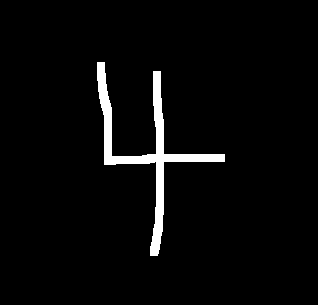

In [201]:
Image.open(input_image_path)

In [199]:
prediction = clf(torch.Tensor(np.array(Image.open("/content/Screenshot 2024-04-18 214216_resized.png").convert('L')).flatten().reshape(-1, 784)))

In [200]:
torch.argmax(prediction).item()

4